# K-Nearest Neighbors Classifier

## Summary

The K-nearest neighbors (KNN) algorithm is a non-parametric method that can be used for both classification and regression. In this module, we will only look at the KNN classifier.  The algorithm assigns a class to a test observation by identifying the `k` closest training examples for which the class is known and choosing the test class through a simple majority vote, sometimes weighted by a distance parameter. KNN is an example of lazy learning, meaning it doesn't learn a discriminative function from the training data but memorizes the training data instead. It is also an example of instance-based learning, where the raw training samples are used to make the predictions.  

The main steps of a KNN algorithm are:
   1. Choose the number k and the distance metric.
        - choosing the correct number k could mean the difference between overfitting and underfitting.
        - often, we choose a simple Euclidian distance measure for real-valued sample. We have to make sure to standardize the data so that each feature contributes equally to the distance.
   2. Find the k nearest neighbors of the sample that we want to classify.
   3. Assign the class label by majority vote.
        - in the case of a tie, we assign the class whose neighbors are the closest. If the different neighbors are equidistant from the sample, the algorithm will choose the class that comes first in the training dataset.
        -  we can also assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

## Code Example  

We will look at our classic iris dataset to see how well k-NN predicts our target class.

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data:

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

Split the data into test and train sets:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

Scale the features so that they're standardized:

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Run the k-nearest neighbors classifier on the training data and predict on the test data.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='uniform', metric='minkowski')
knn.fit(X_train_std, y_train)
yhat = knn.predict(X_test_std)

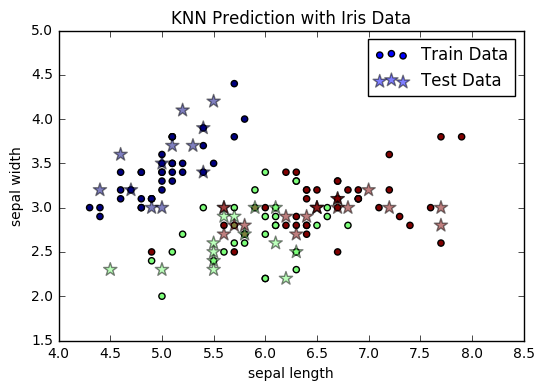

In [8]:
fix, axes = plt.subplots()

axes.scatter(X_train[:,0], X_train[:,1],c=y_train, label='Train Data')
axes.scatter(X_test[:,0], X_test[:,1],c=yhat, marker='*',s=100, alpha=.5, label='Test Data')
axes.set_xlabel('sepal length')
axes.set_ylabel('sepal width')
axes.set_title('KNN Prediction with Iris Data')
axes.legend()

Evaluating our model:

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

print confusion_matrix(y_test, yhat)
print '\n', classification_report(y_test, yhat)

[[12  1  0]
 [ 0 10 10]
 [ 0  3  9]]

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        13
          1       0.71      0.50      0.59        20
          2       0.47      0.75      0.58        12

avg / total       0.73      0.69      0.69        45



### Finding the optimal hyperparameters with GridSearch  
_Important Note_: we must set the cross-validation parameter `cv` to `None` because we want to use the entire training dataset when doing k-nearest neighbors.

In [109]:
from sklearn.grid_search import GridSearchCV
n_neighbors = np.arange(1,8)
algorithm = ['auto', 'brute', 'ball_tree', 'kd_tree']
weights = ['uniform', 'distance']
metric = ['minkowski', 'manhattan']
param_grid = [{'n_neighbors': n_neighbors,
               'algorithm': algorithm,
               'weights': weights,
               'metric': metric}]
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=None, n_jobs=-1)
gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8
{'n_neighbors': 7, 'metric': 'minkowski', 'weights': 'uniform', 'algorithm': 'brute'}


In [110]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
yhat = clf.predict(X_test_std)

print confusion_matrix(y_test, yhat)
print '\n', classification_report(y_test, yhat)

[[12  1  0]
 [ 0 15  5]
 [ 0  3  9]]

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        13
          1       0.79      0.75      0.77        20
          2       0.64      0.75      0.69        12

avg / total       0.81      0.80      0.80        45



We can clearly see that the new model is a substantial improvement in our performance. 

## Additional Resources  

- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
